# Webscrapping 

Le webscrapping est une technique d'extraction de données de sites web par l'utilisation d'un script ou d'un orogramme. c'est souvent l'une des sources de données des organisations. Nous avions besoin des données sur les communes du Cameroun et leur type. L'information était disponible sur un site web à l'addresse https://fr.wikipedia.org/wiki/Commune_(Cameroun). Notre seul recours était d'extraire ces données par webscrapping. Voir image ci dessous.

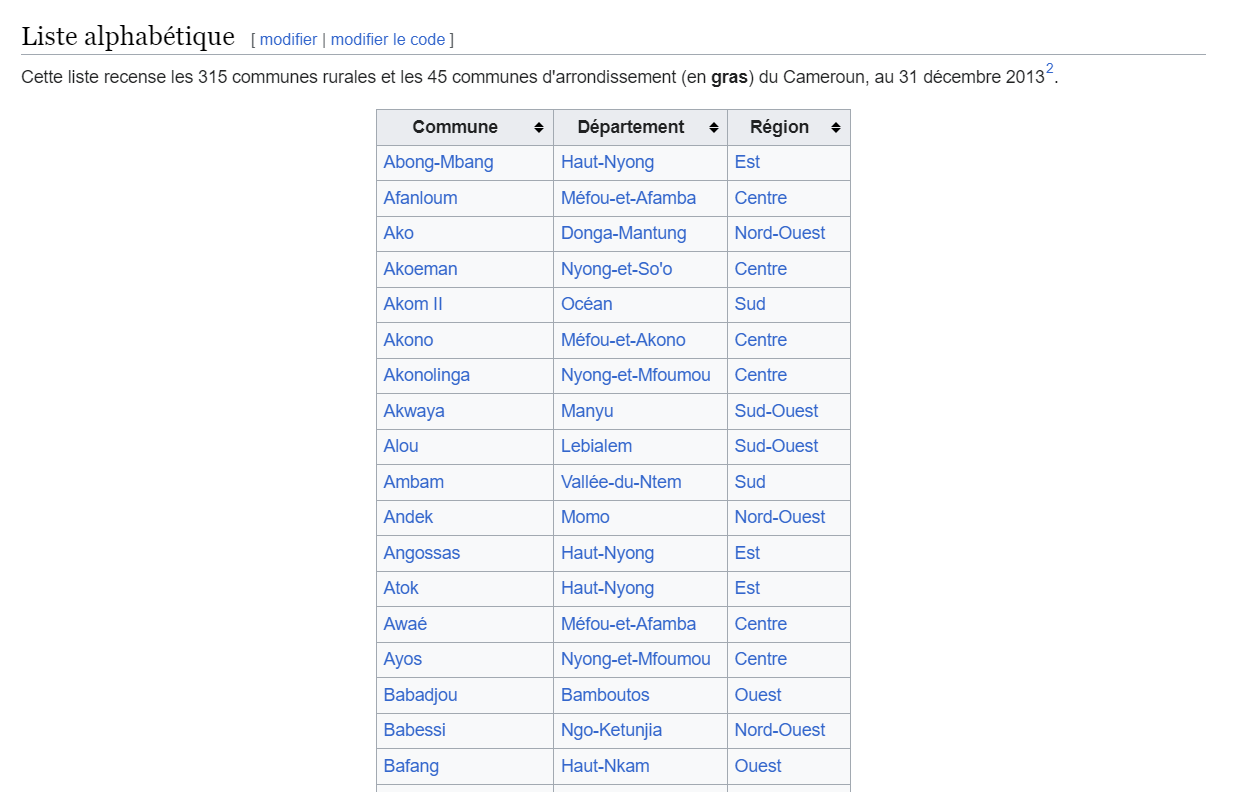


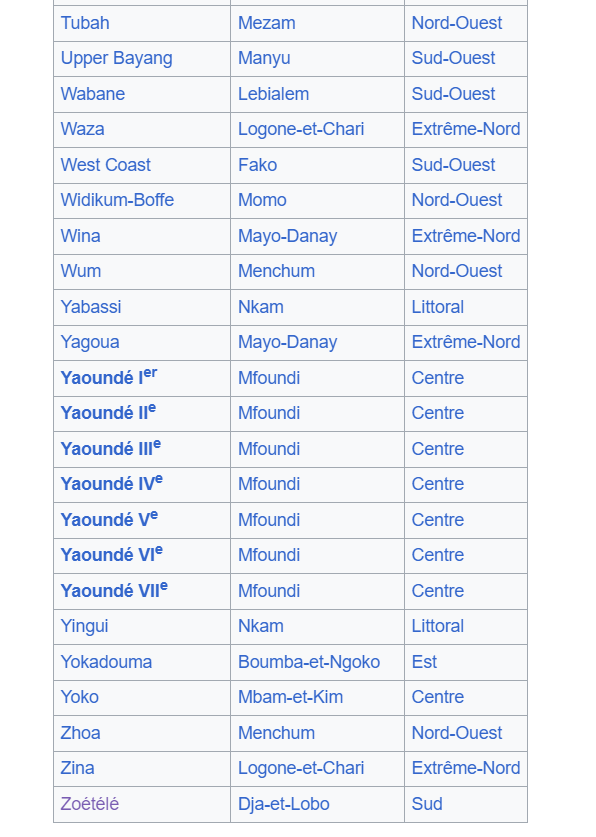

### Importation des librairies surtout requests et BeautifulSoup

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
url = "https://fr.wikipedia.org/wiki/Commune_(Cameroun)"

In [3]:
html_script_response = requests.get(url)

In [4]:
html_script_response

<Response [200]>

In [5]:
html_text = html_script_response.text

In [6]:
soup = BeautifulSoup(html_text, 'html.parser')

In [7]:
#print(soup.prettify)

#### Après inspection de la page (script html), le tableau qui nous interesse est dans une balise "table" où l'attribut "class" a pour valeur "wikitable sortable centre".

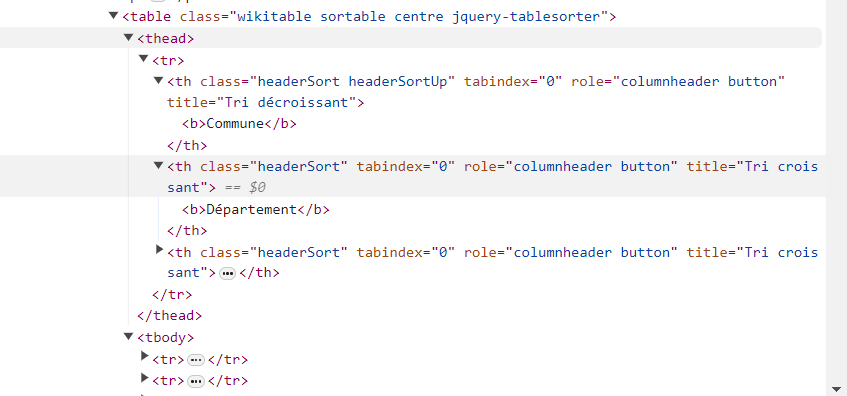

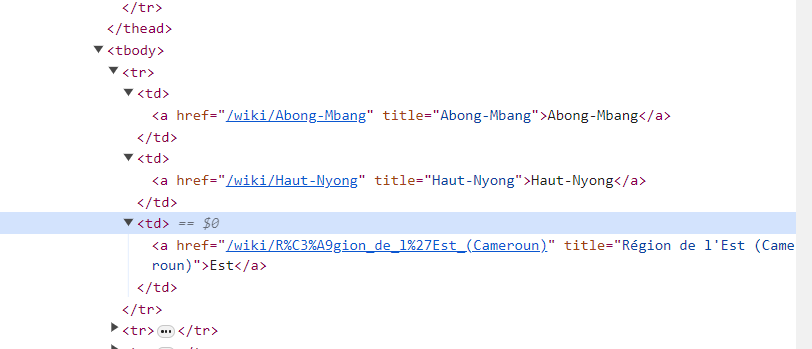

In [ ]:
#### Extraction des 

In [8]:
table_script = soup.find('table', {"class":"wikitable sortable centre"})

In [9]:
table_script

<table class="wikitable sortable centre">
<tbody><tr>
<th><b>Commune</b>
</th>
<th><b>Département</b>
</th>
<th><b>Région</b>
</th></tr>
<tr>
<td><a href="/wiki/Abong-Mbang" title="Abong-Mbang">Abong-Mbang</a></td>
<td><a href="/wiki/Haut-Nyong" title="Haut-Nyong">Haut-Nyong</a></td>
<td><a href="/wiki/R%C3%A9gion_de_l%27Est_(Cameroun)" title="Région de l'Est (Cameroun)">Est</a>
</td></tr>
<tr>
<td><a href="/wiki/Afanloum" title="Afanloum">Afanloum</a></td>
<td><a href="/wiki/M%C3%A9fou-et-Afamba" title="Méfou-et-Afamba">Méfou-et-Afamba</a></td>
<td><a href="/wiki/R%C3%A9gion_du_Centre_(Cameroun)" title="Région du Centre (Cameroun)">Centre</a>
</td></tr>
<tr>
<td><a href="/wiki/Ako_(Cameroun)" title="Ako (Cameroun)">Ako</a></td>
<td><a href="/wiki/Donga-Mantung" title="Donga-Mantung">Donga-Mantung</a></td>
<td><a href="/wiki/R%C3%A9gion_du_Nord-Ouest_(Cameroun)" title="Région du Nord-Ouest (Cameroun)">Nord-Ouest</a>
</td></tr>
<tr>
<td><a href="/wiki/Akoeman" title="Akoeman">Akoeman</a

In [10]:
tab_body = table_script.tbody

In [11]:
tab_body

<tbody><tr>
<th><b>Commune</b>
</th>
<th><b>Département</b>
</th>
<th><b>Région</b>
</th></tr>
<tr>
<td><a href="/wiki/Abong-Mbang" title="Abong-Mbang">Abong-Mbang</a></td>
<td><a href="/wiki/Haut-Nyong" title="Haut-Nyong">Haut-Nyong</a></td>
<td><a href="/wiki/R%C3%A9gion_de_l%27Est_(Cameroun)" title="Région de l'Est (Cameroun)">Est</a>
</td></tr>
<tr>
<td><a href="/wiki/Afanloum" title="Afanloum">Afanloum</a></td>
<td><a href="/wiki/M%C3%A9fou-et-Afamba" title="Méfou-et-Afamba">Méfou-et-Afamba</a></td>
<td><a href="/wiki/R%C3%A9gion_du_Centre_(Cameroun)" title="Région du Centre (Cameroun)">Centre</a>
</td></tr>
<tr>
<td><a href="/wiki/Ako_(Cameroun)" title="Ako (Cameroun)">Ako</a></td>
<td><a href="/wiki/Donga-Mantung" title="Donga-Mantung">Donga-Mantung</a></td>
<td><a href="/wiki/R%C3%A9gion_du_Nord-Ouest_(Cameroun)" title="Région du Nord-Ouest (Cameroun)">Nord-Ouest</a>
</td></tr>
<tr>
<td><a href="/wiki/Akoeman" title="Akoeman">Akoeman</a></td>
<td><a href="/wiki/Nyong-et-So%27o"

In [12]:
row_headers = []
for x in tab_body.find_all("tr"):
    for y in x.find_all('th'):
        row_headers.append(y.text.strip())

In [13]:
row_headers

['Commune', 'Département', 'Région']

In [14]:
tab_values = []
for x in tab_body.find_all("tr")[1:]:
    td_tags = x.find_all('td')
    td_val = [y.text.strip() for y in td_tags]
    tab_values.append(td_val)

In [15]:
tab_values

[['Abong-Mbang', 'Haut-Nyong', 'Est'],
 ['Afanloum', 'Méfou-et-Afamba', 'Centre'],
 ['Ako', 'Donga-Mantung', 'Nord-Ouest'],
 ['Akoeman', "Nyong-et-So'o", 'Centre'],
 ['Akom II', 'Océan', 'Sud'],
 ['Akono', 'Méfou-et-Akono', 'Centre'],
 ['Akonolinga', 'Nyong-et-Mfoumou', 'Centre'],
 ['Akwaya', 'Manyu', 'Sud-Ouest'],
 ['Alou', 'Lebialem', 'Sud-Ouest'],
 ['Ambam', 'Vallée-du-Ntem', 'Sud'],
 ['Andek', 'Momo', 'Nord-Ouest'],
 ['Angossas', 'Haut-Nyong', 'Est'],
 ['Atok', 'Haut-Nyong', 'Est'],
 ['Awaé', 'Méfou-et-Afamba', 'Centre'],
 ['Ayos', 'Nyong-et-Mfoumou', 'Centre'],
 ['Babadjou', 'Bamboutos', 'Ouest'],
 ['Babessi', 'Ngo-Ketunjia', 'Nord-Ouest'],
 ['Bafang', 'Haut-Nkam', 'Ouest'],
 ['Bafia', 'Mbam-et-Inoubou', 'Centre'],
 ['Bafoussam Ier', 'Mifi', 'Ouest'],
 ['Bafoussam IIe', 'Mifi', 'Ouest'],
 ['Bafoussam IIIe', 'Mifi', 'Ouest'],
 ['Bafut', 'Mezam', 'Nord-Ouest'],
 ['Baham', 'Hauts-Plateaux', 'Ouest'],
 ['Bakou', 'Haut-Nkam', 'Ouest'],
 ['Bali', 'Mezam', 'Nord-Ouest'],
 ['Balikumbat', 

In [16]:
communes_cam = pd.DataFrame(tab_values, columns=row_headers)

In [17]:
communes_cam

,Commune,Département,Région
0,Abong-Mbang,Haut-Nyong,Est
1,Afanloum,Méfou-et-Afamba,Centre
2,Ako,Donga-Mantung,Nord-Ouest
3,Akoeman,Nyong-et-So'o,Centre
4,Akom II,Océan,Sud
...,...,...,...
355,Yokadouma,Boumba-et-Ngoko,Est
356,Yoko,Mbam-et-Kim,Centre
357,Zhoa,Menchum,Nord-Ouest
358,Zina,Logone-et-Chari,Extrême-Nord


In [18]:
## Communes d'arrondissement

In [19]:
#communes_cam[communes_cam['Commune'].str.contains(["Ier", "IIe", "IIIe", "IVe", "Ve", "VIe", "VIIe"])]

In [20]:
communes_arrondissement = communes_cam[communes_cam['Commune'].str.contains("Ier|IIe|IIIe|IVe|Ve|VIe|VIIe", regex=True)]

In [21]:
communes_arrondissement

,Commune,Département,Région
19,Bafoussam Ier,Mifi,Ouest
20,Bafoussam IIe,Mifi,Ouest
21,Bafoussam IIIe,Mifi,Ouest
27,Bamenda Ier,Mezam,Nord-Ouest
28,Bamenda IIe,Mezam,Nord-Ouest
29,Bamenda IIIe,Mezam,Nord-Ouest
60,Bertoua Ier,Lom-et-Djérem,Est
61,Bertoua IIe,Lom-et-Djérem,Est
95,Douala Ier,Wouri,Littoral
96,Douala IIe,Wouri,Littoral


In [22]:
## communes rurales

In [23]:
communes_rurales = communes_cam[~communes_cam['Commune'].str.contains("Ier|IIe|IIIe|IVe|Ve|VIe|VIIe", regex=True)]

In [24]:
communes_rurales

,Commune,Département,Région
0,Abong-Mbang,Haut-Nyong,Est
1,Afanloum,Méfou-et-Afamba,Centre
2,Ako,Donga-Mantung,Nord-Ouest
3,Akoeman,Nyong-et-So'o,Centre
4,Akom II,Océan,Sud
...,...,...,...
355,Yokadouma,Boumba-et-Ngoko,Est
356,Yoko,Mbam-et-Kim,Centre
357,Zhoa,Menchum,Nord-Ouest
358,Zina,Logone-et-Chari,Extrême-Nord


In [25]:
len(communes_arrondissement)

45

In [26]:
departements = communes_cam['Département'].unique()

In [27]:
departements

array(['Haut-Nyong', 'Méfou-et-Afamba', 'Donga-Mantung', "Nyong-et-So'o",
       'Océan', 'Méfou-et-Akono', 'Nyong-et-Mfoumou', 'Manyu', 'Lebialem',
       'Vallée-du-Ntem', 'Momo', 'Bamboutos', 'Ngo-Ketunjia', 'Haut-Nkam',
       'Mbam-et-Inoubou', 'Mifi', 'Mezam', 'Hauts-Plateaux', 'Ndian',
       'Koung-Khi', 'Ndé', 'Koupé-Manengouba', 'Noun', 'Mayo-Banyo',
       'Moungo', 'Bénoué', 'Lekié', 'Kadey', 'Faro', 'Lom-et-Djérem',
       'Vina', 'Boyo', 'Menchum', 'Dja-et-Lobo', 'Haute-Sanaga', 'Mvila',
       'Nyong-et-Kéllé', 'Logone-et-Chari', 'Diamaré', 'Mayo-Tsanaga',
       'Fako', 'Mayo-Danay', 'Sanaga-Maritime', 'Mbéré', 'Wouri',
       'Menoua', 'Mayo-Kani', 'Bui', 'Mayo-Louti', 'Faro-et-Déo',
       'Boumba-et-Ngoko', 'Mayo-Sava', 'Meme', 'Mayo-Rey', 'Mbam-et-Kim',
       'Mfoundi', 'Nkam', 'Djerem'], dtype=object)

In [28]:
len(departements)

58

In [29]:
region = communes_cam['Région'].unique()

In [30]:
region

array(['Est', 'Centre', 'Nord-Ouest', 'Sud', 'Sud-Ouest', 'Ouest',
       'Adamaoua', 'Littoral', 'Nord', 'Extrême-Nord'], dtype=object)

### Les données ont été extraites et converties en dataframe puis sauvegardées sous fichier csv.

In [31]:
communes_cam.to_csv('communes_cam.csv')

In [32]:
communes_arrondissement.to_csv('communes_arrondissement.csv')

In [33]:
communes_rurales.to_csv('communes_rurales.csv')